In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,auc,precision_recall_curve
from sklearn import preprocessing

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers

In [2]:
data=pd.read_csv('bank.csv')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
data.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:
# I'll drop the first three columns ('RowNumber','CustomerId','Surname') as these data have no effect or importance.

data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.shape

(10000, 11)

In [6]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# check for duplicated rows
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
# figure out the statistical characterastics of the data set attributes
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
# chech out the percentage of calss '0' and class '1', to determine the dataset's imbalance level.

data['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

according to the perecentage figures, the dataset is not highly imbalanced to the extent that a imblean techniques are needed to apply.

In [12]:
# check out the exited and not exited distributions in the three countries to identify if this attribute to be kept or dropped.
data['Geography'].value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

In [13]:
data[data['Geography']=='France']['Exited'].value_counts(normalize=True)

0    0.838452
1    0.161548
Name: Exited, dtype: float64

In [14]:
data[data['Geography']=='Germany']['Exited'].value_counts(normalize=True)

0    0.675568
1    0.324432
Name: Exited, dtype: float64

In [15]:
data[data['Geography']=='Spain']['Exited'].value_counts(normalize=True)

0    0.833266
1    0.166734
Name: Exited, dtype: float64

the column will be kept in the dataset as it's not severely biased toward calss '0'

In [16]:
# check out the exited and not exited distributions in the Gender column to identify if this attribute to be kept or dropped.
data['Gender'].value_counts(normalize=True)

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64

the distrbution between males and females are very close so the column will be kept.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


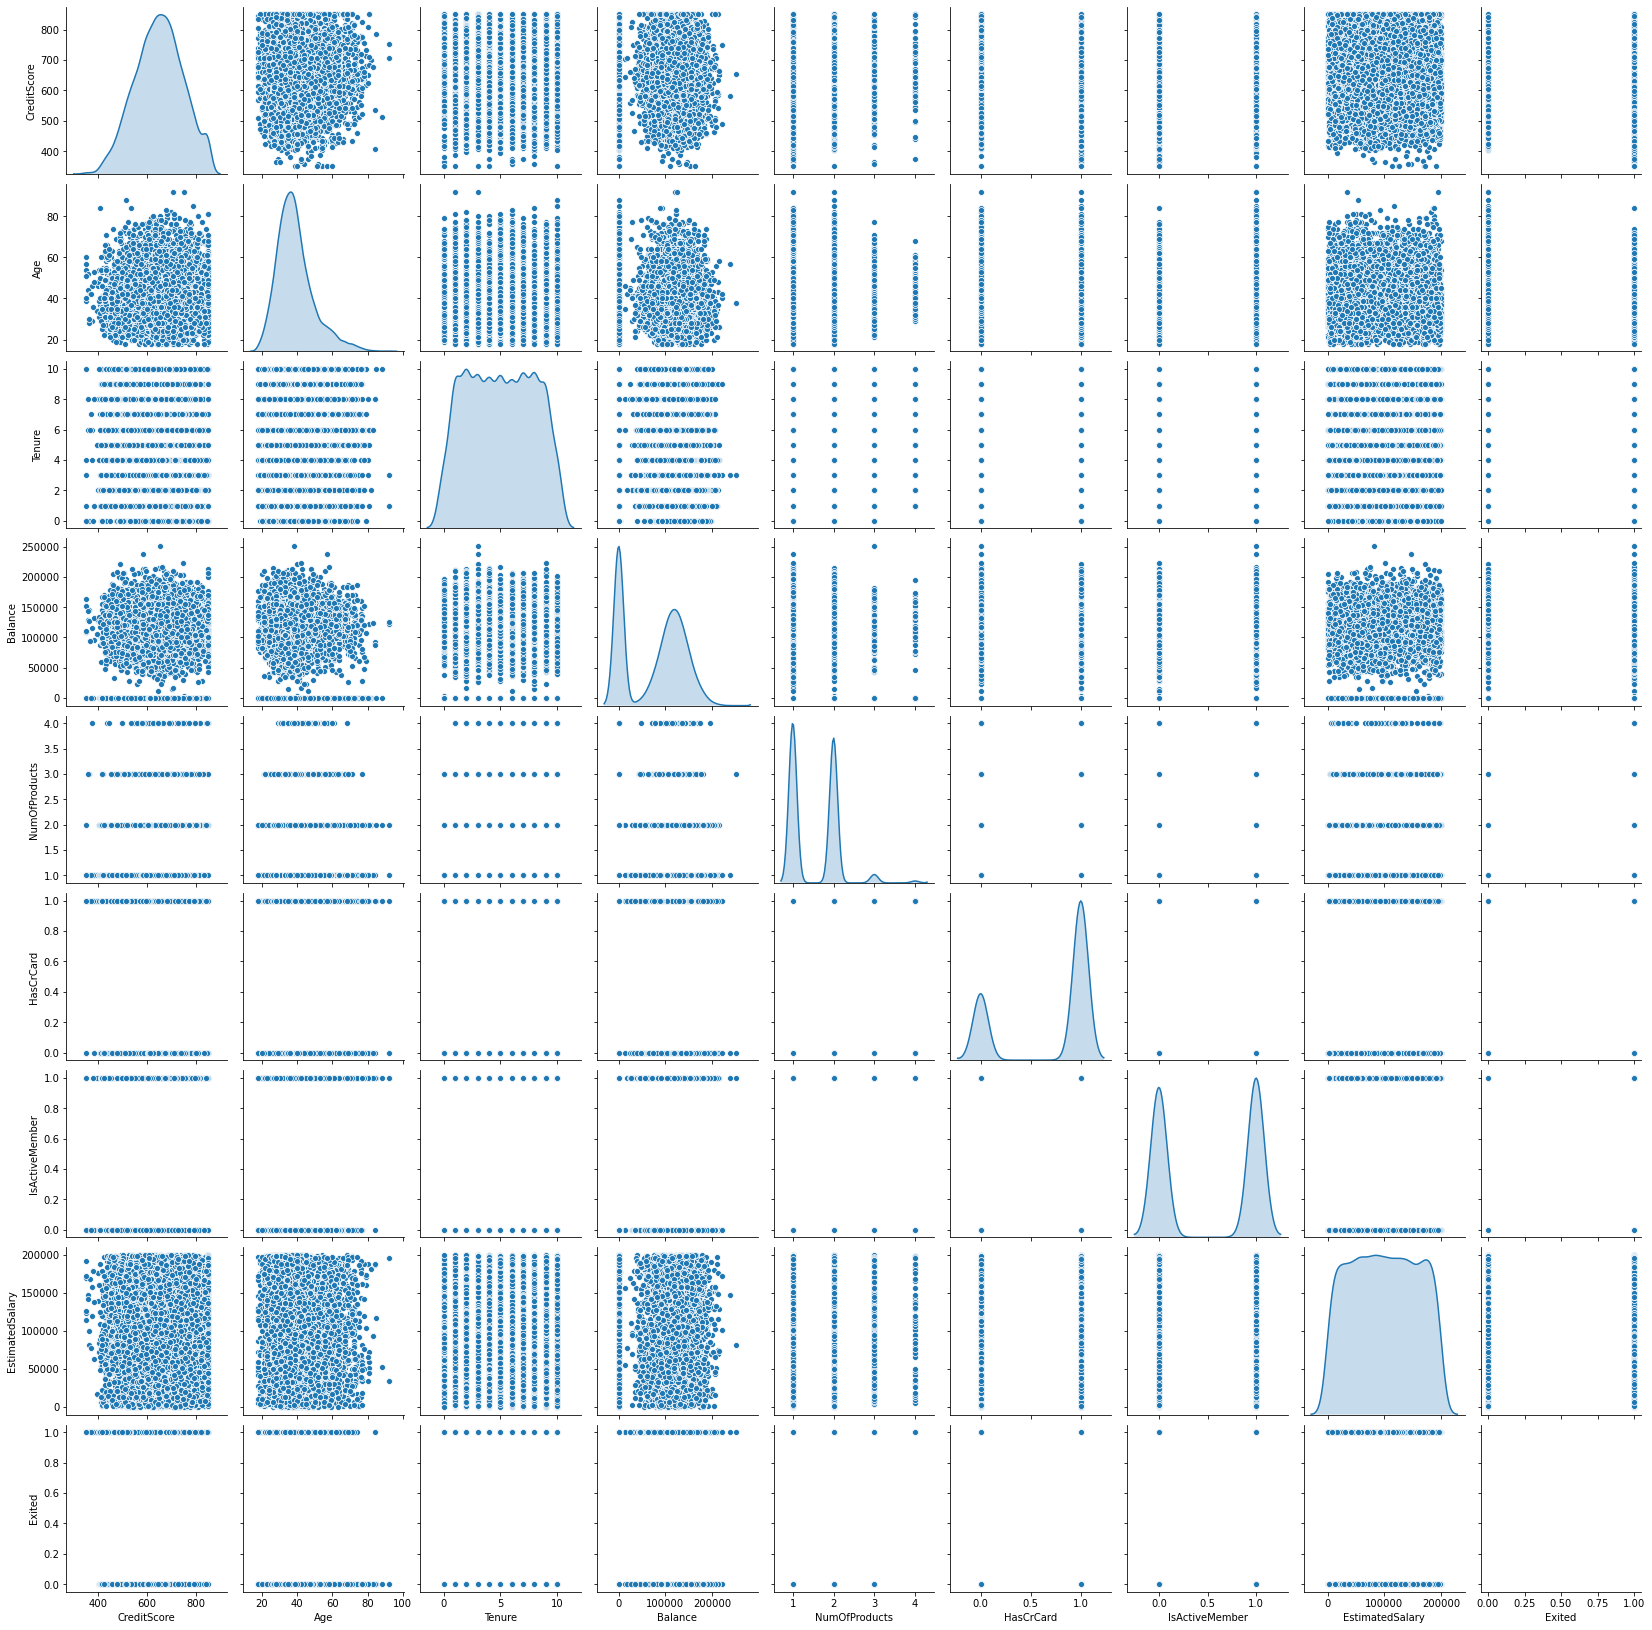

In [17]:
# will use the pairplot and the heatmap of corr() to identify the stregnth of relations between the input variables
# and the target variable 'Exited'
sns.pairplot(data,diag_kind='kde')

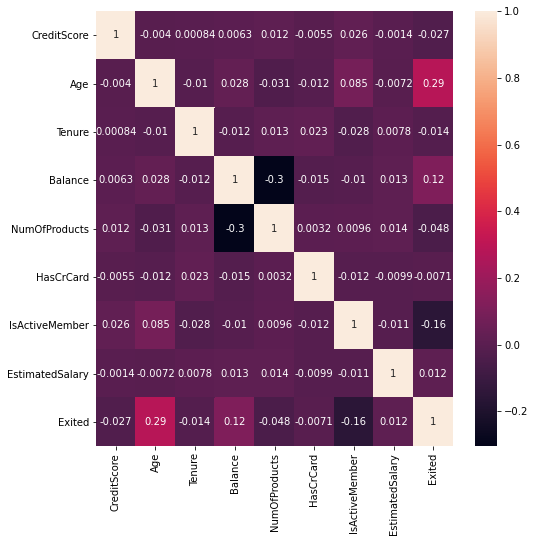

In [18]:
plt.figure(figsize = (8,8))
sns.heatmap(data.corr(),annot=True)

as seen from the two figures, all the attributes have very weak linearity with the target, maybe except 'Age' has a slight linearity relation(0.29), as after age 70, the number of exiting customers is decreasing.

also the balance(0.12) has a slight impact as the number of customers with balance over around 230,000 is more tending to exit.

from my point of view, except (Age,Balance), all the attributes should be dropped from the dataset as they have realy no effect
on the target attribute, but I'll keep them for now and fit a model to them, then later will remove them and refit the model again to compare the performance with thier presence and without.


In [19]:
# convert the string values to one-hot code.
data1 = pd.get_dummies(data, columns=['Geography','Gender'])
data1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [20]:
data1.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
dtype: object

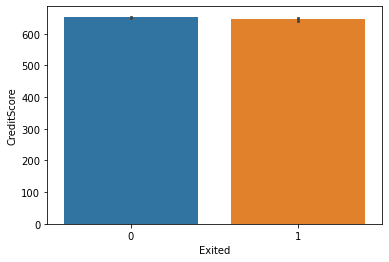

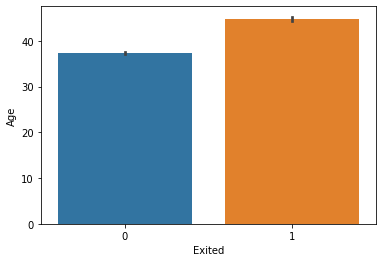

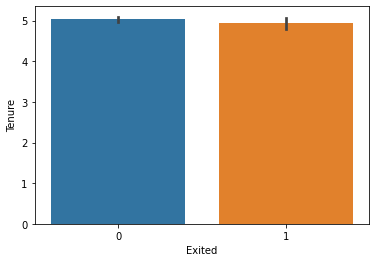

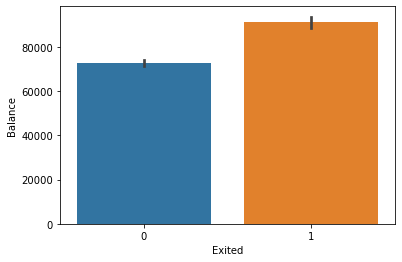

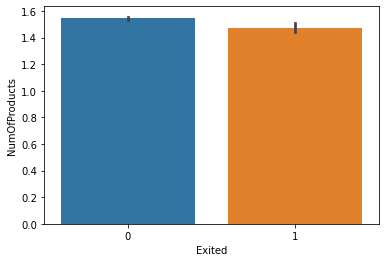

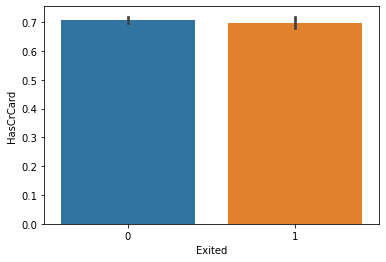

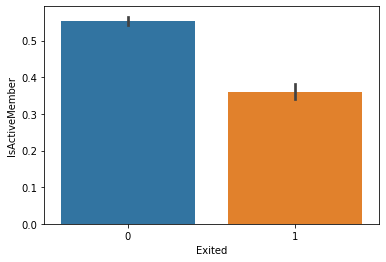

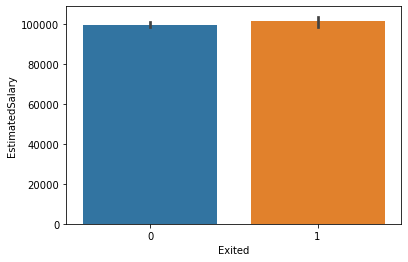

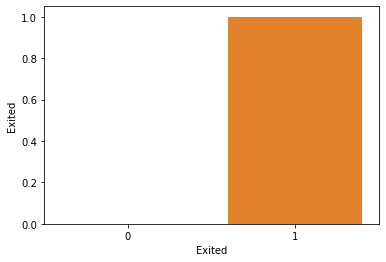

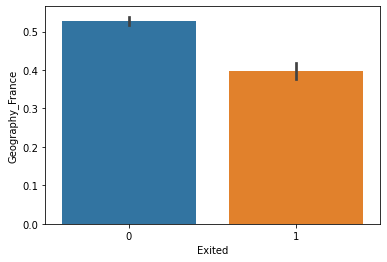

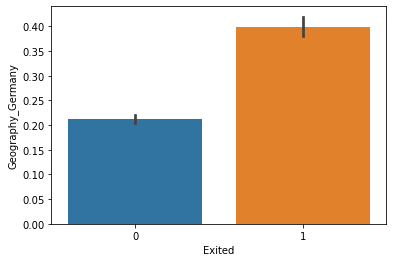

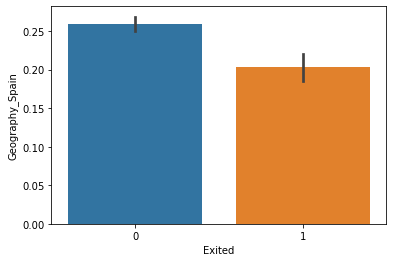

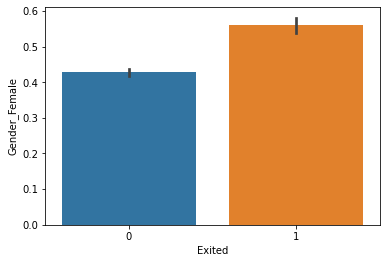

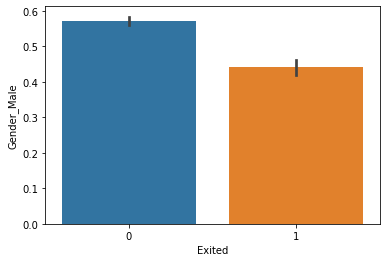

In [21]:
for i in data1.columns:
    sns.barplot(x='Exited',y=i,data=data1)
    plt.show()

# Splitting data

In [22]:
x=data1.drop('Exited',axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [23]:
x.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
dtype: object

In [24]:
x=x.astype('float64')
x.dtypes

CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard            float64
IsActiveMember       float64
EstimatedSalary      float64
Geography_France     float64
Geography_Germany    float64
Geography_Spain      float64
Gender_Female        float64
Gender_Male          float64
dtype: object

In [25]:
y=data1['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [26]:
# Split the data up in train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=75)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 13)
(3000, 13)
(7000,)
(3000,)


# Normalize the train and test data

In [28]:
# Normalize the train and test data
#x_train = preprocessing.normalize(x_train)
#x_test = preprocessing.normalize(x_test)

In [29]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(x_train)

# Scale the train set
x_train = scaler.transform(x_train)

# Scale the test set
x_test = scaler.transform(x_test)

# Build the DNN model

In [81]:
# build the NN model using Sequential calss
model = Sequential()

# Adding the layres with 13 inputs and fully connected neurons.
# using 'ELU' and 'ReLU' activation functions in the hidden layers
# using one sigmoid function at the output as it's a classification model
model.add(Dense(128, input_shape = (13,), activation = 'elu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'swish'))
model.add(Dense(16, activation = 'elu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'swish'))
model.add(Dense(16, activation = 'elu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'swish'))
model.add(Dense(1, activation = 'sigmoid'))

# choose the optimizer, learning rate, loss function,metrics 
optm=optimizers.Adam(lr=0.0015)
model.compile(optimizer = optm, loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_43 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_44 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_45 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_46 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_47 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_48 (Dense)             (None, 16)               

Epoch 1/850
6/6 [==============================] - 0s 11ms/step - loss: 0.3123 - accuracy: 0.8818 - val_loss: 0.5526 - val_accuracy: 0.8250
Epoch 2/850
6/6 [==============================] - 0s 11ms/step - loss: 0.3109 - accuracy: 0.8841 - val_loss: 0.5550 - val_accuracy: 0.8221
Epoch 3/850
6/6 [==============================] - 0s 12ms/step - loss: 0.3126 - accuracy: 0.8825 - val_loss: 0.5501 - val_accuracy: 0.8243
Epoch 4/850
6/6 [==============================] - 0s 12ms/step - loss: 0.3151 - accuracy: 0.8814 - val_loss: 0.5579 - val_accuracy: 0.8236
Epoch 5/850
6/6 [==============================] - 0s 11ms/step - loss: 0.3107 - accuracy: 0.8839 - val_loss: 0.5661 - val_accuracy: 0.8279
Epoch 6/850
6/6 [==============================] - 0s 12ms/step - loss: 0.3135 - accuracy: 0.8814 - val_loss: 0.5643 - val_accuracy: 0.8257
Epoch 7/850
6/6 [==============================] - 0s 11ms/step - loss: 0.3148 - accuracy: 0.8805 - val_loss: 0.5573 - val_accuracy: 0.8243
Epoch 8/850
6/6 [===

6/6 [==============================] - 0s 14ms/step - loss: 0.2951 - accuracy: 0.8816 - val_loss: 0.7286 - val_accuracy: 0.8307
Epoch 118/850
6/6 [==============================] - 0s 13ms/step - loss: 0.3006 - accuracy: 0.8814 - val_loss: 0.6892 - val_accuracy: 0.8314
Epoch 119/850
6/6 [==============================] - 0s 14ms/step - loss: 0.3086 - accuracy: 0.8793 - val_loss: 0.7262 - val_accuracy: 0.8179
Epoch 120/850
6/6 [==============================] - 0s 14ms/step - loss: 0.3060 - accuracy: 0.8798 - val_loss: 0.7057 - val_accuracy: 0.8257
Epoch 121/850
6/6 [==============================] - 0s 13ms/step - loss: 0.3058 - accuracy: 0.8800 - val_loss: 0.6230 - val_accuracy: 0.8207
Epoch 122/850
6/6 [==============================] - 0s 13ms/step - loss: 0.3203 - accuracy: 0.8682 - val_loss: 0.7122 - val_accuracy: 0.8236
Epoch 123/850
6/6 [==============================] - 0s 12ms/step - loss: 0.3151 - accuracy: 0.8734 - val_loss: 0.6663 - val_accuracy: 0.8193
Epoch 124/850
6/6 [=

Epoch 175/850
6/6 [==============================] - 0s 14ms/step - loss: 0.2678 - accuracy: 0.8896 - val_loss: 0.8445 - val_accuracy: 0.8221
Epoch 176/850
6/6 [==============================] - 0s 12ms/step - loss: 0.2685 - accuracy: 0.8896 - val_loss: 0.8257 - val_accuracy: 0.8243
Epoch 177/850
6/6 [==============================] - 0s 14ms/step - loss: 0.2682 - accuracy: 0.8898 - val_loss: 0.8216 - val_accuracy: 0.8264
Epoch 178/850
6/6 [==============================] - 0s 12ms/step - loss: 0.2683 - accuracy: 0.8895 - val_loss: 0.8512 - val_accuracy: 0.8257
Epoch 179/850
6/6 [==============================] - 0s 13ms/step - loss: 0.2677 - accuracy: 0.8898 - val_loss: 0.8505 - val_accuracy: 0.8229
Epoch 180/850
6/6 [==============================] - 0s 13ms/step - loss: 0.2676 - accuracy: 0.8895 - val_loss: 0.8501 - val_accuracy: 0.8257
Epoch 181/850
6/6 [==============================] - 0s 12ms/step - loss: 0.2688 - accuracy: 0.8893 - val_loss: 0.8383 - val_accuracy: 0.8279
Epoch 

Epoch 233/850
6/6 [==============================] - 0s 12ms/step - loss: 0.2776 - accuracy: 0.8816 - val_loss: 0.8717 - val_accuracy: 0.8343
Epoch 234/850
6/6 [==============================] - 0s 14ms/step - loss: 0.2789 - accuracy: 0.8811 - val_loss: 0.8741 - val_accuracy: 0.8371
Epoch 235/850
6/6 [==============================] - 0s 12ms/step - loss: 0.2772 - accuracy: 0.8813 - val_loss: 0.8755 - val_accuracy: 0.8307
Epoch 236/850
6/6 [==============================] - 0s 14ms/step - loss: 0.2763 - accuracy: 0.8820 - val_loss: 0.8848 - val_accuracy: 0.8293
Epoch 237/850
6/6 [==============================] - 0s 14ms/step - loss: 0.2765 - accuracy: 0.8820 - val_loss: 0.8960 - val_accuracy: 0.8300
Epoch 238/850
6/6 [==============================] - 0s 15ms/step - loss: 0.2749 - accuracy: 0.8818 - val_loss: 0.8837 - val_accuracy: 0.8300
Epoch 239/850
6/6 [==============================] - 0s 13ms/step - loss: 0.2722 - accuracy: 0.8825 - val_loss: 0.8640 - val_accuracy: 0.8343
Epoch 

Epoch 291/850
6/6 [==============================] - 0s 13ms/step - loss: 0.2658 - accuracy: 0.8793 - val_loss: 0.9928 - val_accuracy: 0.8350
Epoch 292/850
6/6 [==============================] - 0s 12ms/step - loss: 0.2626 - accuracy: 0.8813 - val_loss: 1.0195 - val_accuracy: 0.8343
Epoch 293/850
6/6 [==============================] - 0s 13ms/step - loss: 0.2615 - accuracy: 0.8811 - val_loss: 0.9218 - val_accuracy: 0.8343
Epoch 294/850
6/6 [==============================] - 0s 12ms/step - loss: 0.2607 - accuracy: 0.8816 - val_loss: 0.9246 - val_accuracy: 0.8364
Epoch 295/850
6/6 [==============================] - 0s 14ms/step - loss: 0.2601 - accuracy: 0.8807 - val_loss: 0.9162 - val_accuracy: 0.8371
Epoch 296/850
6/6 [==============================] - 0s 15ms/step - loss: 0.2656 - accuracy: 0.8796 - val_loss: 0.9759 - val_accuracy: 0.8371
Epoch 297/850
6/6 [==============================] - 0s 13ms/step - loss: 0.2698 - accuracy: 0.8789 - val_loss: 0.9412 - val_accuracy: 0.8336
Epoch 

Epoch 349/850
6/6 [==============================] - 0s 12ms/step - loss: 0.2399 - accuracy: 0.8798 - val_loss: 1.2023 - val_accuracy: 0.8271
Epoch 350/850
6/6 [==============================] - 0s 13ms/step - loss: 0.2418 - accuracy: 0.8793 - val_loss: 1.1728 - val_accuracy: 0.8307
Epoch 351/850
6/6 [==============================] - 0s 12ms/step - loss: 0.2388 - accuracy: 0.8786 - val_loss: 1.2268 - val_accuracy: 0.8264
Epoch 352/850
6/6 [==============================] - 0s 12ms/step - loss: 0.2383 - accuracy: 0.8802 - val_loss: 1.2661 - val_accuracy: 0.8293
Epoch 353/850
6/6 [==============================] - 0s 12ms/step - loss: 0.2414 - accuracy: 0.8786 - val_loss: 1.2702 - val_accuracy: 0.8300
Epoch 354/850
6/6 [==============================] - 0s 13ms/step - loss: 0.2375 - accuracy: 0.8795 - val_loss: 1.2696 - val_accuracy: 0.8314
Epoch 355/850
6/6 [==============================] - 0s 13ms/step - loss: 0.2370 - accuracy: 0.8796 - val_loss: 1.3253 - val_accuracy: 0.8314
Epoch 

Epoch 407/850
6/6 [==============================] - 0s 13ms/step - loss: 0.2168 - accuracy: 0.8780 - val_loss: 1.0862 - val_accuracy: 0.8336
Epoch 408/850
6/6 [==============================] - 0s 12ms/step - loss: 0.2152 - accuracy: 0.8771 - val_loss: 1.1034 - val_accuracy: 0.8379
Epoch 409/850
6/6 [==============================] - 0s 13ms/step - loss: 0.2140 - accuracy: 0.8788 - val_loss: 1.1777 - val_accuracy: 0.8343
Epoch 410/850
6/6 [==============================] - 0s 13ms/step - loss: 0.2067 - accuracy: 0.8798 - val_loss: 1.2054 - val_accuracy: 0.8314
Epoch 411/850
6/6 [==============================] - 0s 14ms/step - loss: 0.2022 - accuracy: 0.8800 - val_loss: 1.1831 - val_accuracy: 0.8307
Epoch 412/850
6/6 [==============================] - 0s 13ms/step - loss: 0.1988 - accuracy: 0.8802 - val_loss: 1.2175 - val_accuracy: 0.8271
Epoch 413/850
6/6 [==============================] - 0s 12ms/step - loss: 0.1993 - accuracy: 0.8802 - val_loss: 1.2240 - val_accuracy: 0.8279
Epoch 

Epoch 465/850
6/6 [==============================] - 0s 12ms/step - loss: 0.1650 - accuracy: 0.8989 - val_loss: 1.2544 - val_accuracy: 0.8221
Epoch 466/850
6/6 [==============================] - 0s 13ms/step - loss: 0.1646 - accuracy: 0.9014 - val_loss: 1.2379 - val_accuracy: 0.8107
Epoch 467/850
6/6 [==============================] - 0s 13ms/step - loss: 0.1652 - accuracy: 0.9045 - val_loss: 1.3197 - val_accuracy: 0.8114
Epoch 468/850
6/6 [==============================] - 0s 13ms/step - loss: 0.1632 - accuracy: 0.9038 - val_loss: 1.3440 - val_accuracy: 0.8014
Epoch 469/850
6/6 [==============================] - 0s 14ms/step - loss: 0.1610 - accuracy: 0.9030 - val_loss: 1.2959 - val_accuracy: 0.8021
Epoch 470/850
6/6 [==============================] - 0s 13ms/step - loss: 0.1576 - accuracy: 0.9066 - val_loss: 1.4301 - val_accuracy: 0.8114
Epoch 471/850
6/6 [==============================] - 0s 11ms/step - loss: 0.1627 - accuracy: 0.9055 - val_loss: 1.3072 - val_accuracy: 0.8114
Epoch 

Epoch 523/850
6/6 [==============================] - 0s 13ms/step - loss: 0.1647 - accuracy: 0.9107 - val_loss: 1.4786 - val_accuracy: 0.7886
Epoch 524/850
6/6 [==============================] - 0s 14ms/step - loss: 0.1608 - accuracy: 0.9109 - val_loss: 1.5535 - val_accuracy: 0.7836
Epoch 525/850
6/6 [==============================] - 0s 14ms/step - loss: 0.1772 - accuracy: 0.9062 - val_loss: 1.4403 - val_accuracy: 0.7836
Epoch 526/850
6/6 [==============================] - 0s 12ms/step - loss: 0.1590 - accuracy: 0.9141 - val_loss: 1.5414 - val_accuracy: 0.7729
Epoch 527/850
6/6 [==============================] - 0s 13ms/step - loss: 0.1600 - accuracy: 0.9123 - val_loss: 1.4998 - val_accuracy: 0.8021
Epoch 528/850
6/6 [==============================] - 0s 11ms/step - loss: 0.1593 - accuracy: 0.9112 - val_loss: 1.3952 - val_accuracy: 0.7736
Epoch 529/850
6/6 [==============================] - 0s 14ms/step - loss: 0.1626 - accuracy: 0.9102 - val_loss: 1.3882 - val_accuracy: 0.7900
Epoch 

Epoch 638/850
6/6 [==============================] - 0s 12ms/step - loss: 0.1026 - accuracy: 0.9504 - val_loss: 1.7460 - val_accuracy: 0.7836
Epoch 639/850
6/6 [==============================] - 0s 14ms/step - loss: 0.1043 - accuracy: 0.9507 - val_loss: 1.7499 - val_accuracy: 0.7850
Epoch 640/850
6/6 [==============================] - 0s 13ms/step - loss: 0.1007 - accuracy: 0.9511 - val_loss: 1.7927 - val_accuracy: 0.7579
Epoch 641/850
6/6 [==============================] - 0s 13ms/step - loss: 0.1124 - accuracy: 0.9429 - val_loss: 1.8835 - val_accuracy: 0.7807
Epoch 642/850
6/6 [==============================] - 0s 13ms/step - loss: 0.1141 - accuracy: 0.9443 - val_loss: 1.8038 - val_accuracy: 0.7571
Epoch 643/850
6/6 [==============================] - 0s 13ms/step - loss: 0.1084 - accuracy: 0.9464 - val_loss: 1.7188 - val_accuracy: 0.7771
Epoch 644/850
6/6 [==============================] - 0s 14ms/step - loss: 0.1081 - accuracy: 0.9488 - val_loss: 1.6806 - val_accuracy: 0.7729
Epoch 

Epoch 696/850
6/6 [==============================] - 0s 13ms/step - loss: 0.0847 - accuracy: 0.9613 - val_loss: 2.0515 - val_accuracy: 0.7950
Epoch 697/850
6/6 [==============================] - 0s 15ms/step - loss: 0.0852 - accuracy: 0.9611 - val_loss: 2.0985 - val_accuracy: 0.7986
Epoch 698/850
6/6 [==============================] - 0s 12ms/step - loss: 0.0855 - accuracy: 0.9607 - val_loss: 2.0506 - val_accuracy: 0.7921
Epoch 699/850
6/6 [==============================] - 0s 12ms/step - loss: 0.0856 - accuracy: 0.9607 - val_loss: 2.0854 - val_accuracy: 0.7950
Epoch 700/850
6/6 [==============================] - 0s 14ms/step - loss: 0.0854 - accuracy: 0.9609 - val_loss: 2.0813 - val_accuracy: 0.7900
Epoch 701/850
6/6 [==============================] - 0s 15ms/step - loss: 0.0850 - accuracy: 0.9611 - val_loss: 2.1025 - val_accuracy: 0.7950
Epoch 702/850
6/6 [==============================] - 0s 19ms/step - loss: 0.0846 - accuracy: 0.9614 - val_loss: 2.1201 - val_accuracy: 0.7921
Epoch 

Epoch 754/850
6/6 [==============================] - 0s 12ms/step - loss: 0.1107 - accuracy: 0.9500 - val_loss: 1.9985 - val_accuracy: 0.7757
Epoch 755/850
6/6 [==============================] - 0s 13ms/step - loss: 0.1079 - accuracy: 0.9493 - val_loss: 2.0371 - val_accuracy: 0.7793
Epoch 756/850
6/6 [==============================] - 0s 12ms/step - loss: 0.1155 - accuracy: 0.9479 - val_loss: 1.9119 - val_accuracy: 0.7879
Epoch 757/850
6/6 [==============================] - 0s 12ms/step - loss: 0.1135 - accuracy: 0.9470 - val_loss: 1.9749 - val_accuracy: 0.7786
Epoch 758/850
6/6 [==============================] - 0s 15ms/step - loss: 0.1111 - accuracy: 0.9504 - val_loss: 1.8689 - val_accuracy: 0.7721
Epoch 759/850
6/6 [==============================] - 0s 15ms/step - loss: 0.1073 - accuracy: 0.9502 - val_loss: 1.9041 - val_accuracy: 0.7800
Epoch 760/850
6/6 [==============================] - 0s 12ms/step - loss: 0.1207 - accuracy: 0.9457 - val_loss: 1.8592 - val_accuracy: 0.7900
Epoch 

Epoch 812/850
6/6 [==============================] - 0s 17ms/step - loss: 0.0816 - accuracy: 0.9636 - val_loss: 1.9214 - val_accuracy: 0.8029
Epoch 813/850
6/6 [==============================] - 0s 16ms/step - loss: 0.0815 - accuracy: 0.9636 - val_loss: 1.9112 - val_accuracy: 0.8014
Epoch 814/850
6/6 [==============================] - 0s 16ms/step - loss: 0.0814 - accuracy: 0.9638 - val_loss: 1.9183 - val_accuracy: 0.7986
Epoch 815/850
6/6 [==============================] - 0s 16ms/step - loss: 0.0815 - accuracy: 0.9638 - val_loss: 1.9204 - val_accuracy: 0.7986
Epoch 816/850
6/6 [==============================] - 0s 16ms/step - loss: 0.0815 - accuracy: 0.9638 - val_loss: 1.9421 - val_accuracy: 0.8014
Epoch 817/850
6/6 [==============================] - 0s 16ms/step - loss: 0.0813 - accuracy: 0.9638 - val_loss: 1.9501 - val_accuracy: 0.8021
Epoch 818/850
6/6 [==============================] - 0s 16ms/step - loss: 0.0813 - accuracy: 0.9638 - val_loss: 1.9526 - val_accuracy: 0.8036
Epoch 

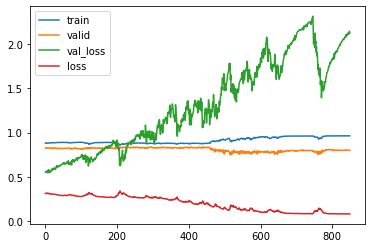

In [85]:
# fit the model to the training set.
epoch=850
model_hist=model.fit(x_train, y_train,batch_size = 1000,validation_split = 0.2, epochs=epoch, verbose = 1)
model_hist
hist  = pd.DataFrame(model_hist.history)
hist['epoch'] = model_hist.epoch
print(hist)
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.plot(hist['val_loss'])
plt.plot(hist['loss'])
plt.legend(("train" , "valid","val_loss","loss") , loc =0)

# Evaluation

In [86]:
y_preds = model.predict(x_test)

# Predict the results using 0.5 as a threshold
print((y_preds>0.5).astype(int))

# Identify the model evaluation loss and accuracy
results = model.evaluate(x_test, y_test)

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [1]]
94/94 [==============================] - 0s 1ms/step - loss: 1.8167 - accuracy: 0.7983


94/94 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.8443
Accuracy Model: 0.8443333506584167
[[2336   96]
 [ 371  197]]


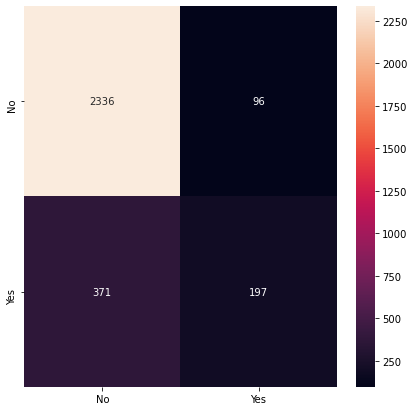

In [84]:
# Accuracy score and confusion matrix
y_predc = model.predict_classes(x_test, batch_size=500, verbose=1)
print('Accuracy Model: '+ str(model.evaluate(x_test,y_test.values)[1]))
print(confusion_matrix(y_test.values,y_predc))

# Using confusion matrix graph to show the model's performance
cm=metrics.confusion_matrix(y_test, y_predc, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                         columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True ,fmt='g');

the model has accuracy at training data = 87.27% and at testing data = 87%, so it performs in very good way on this case study.

I tried to enhance the model by changing the #neurons to 253, #layers from 3 to 6, activation functions('elu','relu','swish'),learning rate(from 0.001 to 0.0015) and epochs(from 20 to 30), the accuracy rose from 79% to 87%.

could not improve more than that, maybe because of the nature of the dataset as the linearity between the attribute and the target are very weak.

